**SVM**

is a supervised machine learning algorithm capable of performing classification, regression and even outlier detection. The linear SVM classifier works by drawing a straight line between two classes. All the data points that fall on one side of the line will be labeled as one class and all the points that fall on the other side will be labeled as the second.(fore more [link text](https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8))

The LSVM algorithm will select a line that not only separates the two classes but stays as far away from the closest samples as possible. In fact, the “support vector” in “support vector machine” refers to two position vectors drawn from the origin to the points which dictate the decision boundary.( fore more [link text](https://www.coryjmaklin.com/machine-learning-algorithms-part-7-linear-support-vector-machine-in-python))

I used K-Fold Cross Validation technique to train-and-test is tried multiple times.(for more [link text](https://scikit-learn.org/stable/modules/cross_validation.html)

I used PCA to dimensionality reduction and for visualize dataset.(for more [link text](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)


In [145]:
# import Libs
import pandas as pd
from sklearn import model_selection

In [146]:
data = pd.read_excel('algerian_forest_fire.xlsx')

In [147]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,y
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


Data expolration

In [148]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'y'],
      dtype='object')

In [149]:
data.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
y                int64
dtype: object

In [150]:
data.y.value_counts()

0    63
1    59
Name: y, dtype: int64

In [151]:
data.shape

(122, 14)

Split data to features as X and labels as y

In [152]:
X = data.drop('y' , axis=1).values
y = data['y'].values
print(X.shape , '   ' , y.shape )

(122, 13)     (122,)


In [153]:
# Model imported
from sklearn import svm

Split data into train and test

In [154]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, y, test_size=0.2, random_state=0)

# Build an SVC (Support Vector Classification) model using linear regression
clf_ob = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)

In [155]:
print(clf_ob.score(X_test, Y_test))

0.9795918367346939


**K-Fold Cross Validation technique**

Basic concept behind K-Fold cross validation is train-and-test is tried multiple times. So data is not split into just one training set and testing set but into multiple randomly assigned segments, K-segments.


In [156]:
scores_res = model_selection.cross_val_score(clf_ob, X, y, cv=5)

# Print the accuracy of each fold (i.e. 5 as above we asked cv 5)
print("Results of the 5 folds score :  ",scores_res,'\n')

# And the mean accuracy of all 5 folds.
print(" The mean of the results : ",scores_res.mean())

Results of the 5 folds score :   [1.         1.         0.91666667 1.         1.        ] 

 The mean of the results :  0.9833333333333332


if dataset to be classified has a lot of features and it is big in size as well then often it impacts management as well as analysis speed.

For this reason, dimensionality reduction techniques helps to figure out way to reduce higher dimensional information into lower dimensional information. Not only can that make it easier to look at, and classify things, but it can also be useful for things like compressing data.

Usually when Dimensionality Reduction topic is talked over, PCA (Principal Component Analysis) technique is reffered.

StandardScaler used to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [157]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [158]:
#Here n_components = 2 means, transform into a 2-Dimensional dataset
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

**Importent**

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 52.44% of the variance and the second principal component contains 15.32% of the variance. Together, the two components contain 95.80% of the information.

In [159]:
pca.explained_variance_ratio_

array([0.52440147, 0.15328577])

In [160]:
print('‘Preserved Variance:’', sum(pca.explained_variance_ratio_))

‘Preserved Variance:’ 0.6776872374260652


In [161]:
# conect labels with 2 dim PCA
finalDf = pd.concat([principalDf, data[['y']]], axis = 1)

print("data before PCA \n",data[ : -1].head());
print("data after PCA : \n",finalDf.head());


data before PCA 
    day  month  year  Temperature   RH   Ws  ...  DMC    DC  ISI  BUI  FWI  y
0    1      6  2012           29   57   18  ...  3.4   7.6  1.3  3.4  0.5  0
1    2      6  2012           29   61   13  ...  4.1   7.6  1.0  3.9  0.4  0
2    3      6  2012           26   82   22  ...  2.5   7.1  0.3  2.7  0.1  0
3    4      6  2012           25   89   13  ...  1.3   6.9  0.0  1.7  0.0  0
4    5      6  2012           27   77   16  ...  3.0  14.2  1.2  3.9  0.5  0

[5 rows x 14 columns]
data after PCA : 
    principal component 1  principal component 2  y
0              -1.945728              -1.005557  0
1              -2.083769              -1.477651  0
2              -4.368066               3.413377  0
3              -4.156084               0.568182  0
4              -2.427556              -0.379260  0


**Visualize 2D**

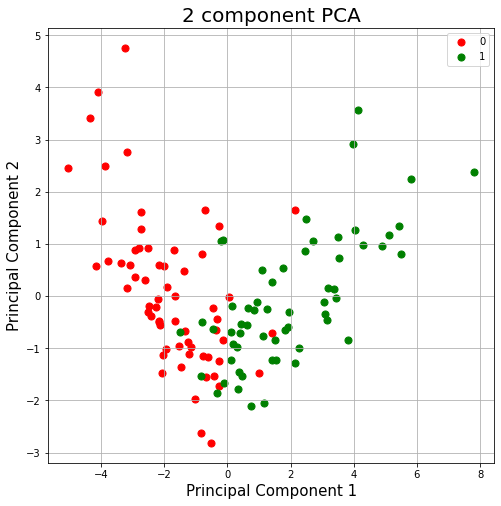

In [162]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()